In [1]:
#IMPORT
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import os
sys.path.append(os.path.abspath("../src"))
from functions_NMM import *

# NMM simulations of near-critical local activity

In [5]:
sigma_values = [0.677]
a_values = [0.967, 0.973, 0.979]

In [6]:
# # Parameters
num_simulations = 1

J = 1.25
omega = 1
nsig = 0.0001
g = np.sqrt(2 * nsig)

In [27]:
cut=5000

# Start the timer
start_time = time.time()

# Dictionary to store the results
R_results = {}
Psi_results = {}

# Loop over parameter space
for i, a in enumerate(tqdm(a_values, desc="Exploring parameter space (a)")):
    R_results[a] = {}
    Psi_results[a] = {}
    for j, sigma in enumerate(sigma_values):
        R_results[a][sigma] = {}
        Psi_results[a][sigma] = {}
        for k in range(num_simulations):
            # Random initial conditions
            R_0 = np.random.uniform(0, 1)
            Psi_0 = np.random.uniform(0, 2 * np.pi)
            y0 = [R_0, Psi_0]

            # Solve the system with Heun stochastic integrator
            t_span = (0, 1500)
            dt = 0.01  # Time step for the integrator
            times, ys = heun_stochastic(system, t_span, y0, dt, a, sigma, g, J, omega)
            
            # Extract R and Psi
            R_results[a][sigma][k] = ys[0][cut:]
            Psi_results[a][sigma][k] = ys[1][cut:]
            
# End the timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.2f} seconds")

Exploring parameter space (a): 100%|██████████████| 3/3 [00:09<00:00,  3.22s/it]

Execution time: 9.67 seconds


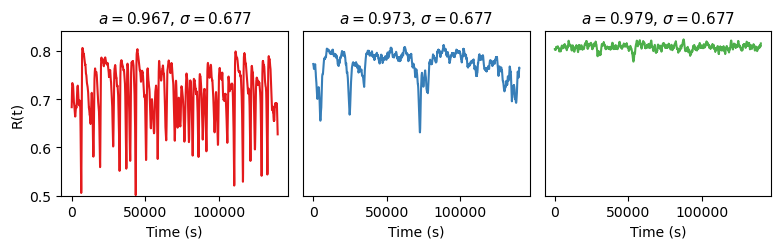

In [29]:
set_colors=[plt.get_cmap('Set1')(0),plt.get_cmap('Set1')(1),plt.get_cmap('Set1')(2)]
plt.figure(figsize=(8,2.6))
for ii, i in enumerate(a_ids):
    plt.subplot(1,len(a_ids),ii+1)
    plt.title(r'$a=%.3f$, $\sigma=%.3f$'%(a_values[i],sigma_values[0]),fontsize=11)
    plt.plot(R_results[a_values[ii]][sigma_values[0]][0][5000:],color=set_colors[ii])
    plt.ylim((0.5,0.84))
    if ii<1:
        plt.ylabel('R(t)')
    else:
        plt.yticks([])
    #plt.xticks([0,10000,20000],['0','0.5','1'])
    plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


# Parameter Space Exploration

In [6]:
center = 0.6725
start = 0.4
end = 1
num_elements = 55
sigma_values = np.linspace(start, end, num_elements)
closest_index = np.abs(sigma_values - center).argmin()
sigma_values[closest_index] = center
sigma_values = np.sort(sigma_values)

center = 0.973
start = 0.6
end = 1.2
num_elements = 55
a_values = np.linspace(start, end, num_elements)
closest_index = np.abs(a_values - center).argmin()
a_values[closest_index] = center
a_values = np.sort(a_values)

In [7]:
num_simulations = 1

J = 1.25
omega = 1
nsig = 0.0001
g = np.sqrt(2 * nsig)

In [69]:
cut=5000

# Dictionary to store the results
R_results = {}
Psi_results = {}

# Start the timer
start_time = time.time()

# Loop over parameter space
for i, a in enumerate(tqdm(a_values, desc="Exploring parameter space (a)")):
    R_results[a] = {}
    Psi_results[a] = {}
    for j, sigma in enumerate(sigma_values):
        R_results[a][sigma] = {}
        Psi_results[a][sigma] = {}
        for k in range(num_simulations):
            # Random initial conditions
            R_0 = np.random.uniform(0, 1)
            Psi_0 = np.random.uniform(0, 2 * np.pi)
            y0 = [R_0, Psi_0]

            # Solve the system with Heun stochastic integrator
            t_span = (0, 1000)
            dt = 0.01  # Time step for the integrator
            times, ys = heun_stochastic(system, t_span, y0, dt, a, sigma, g, J, omega)
            
            # Extract R and Psi
            R_results[a][sigma][k] = ys[0][cut:]
            Psi_results[a][sigma][k] = ys[1][cut:]
            
# End the timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.2f} seconds")

Exploring parameter space (a): 100%|█████████| 55/55 [1:34:00<00:00, 102.56s/it]

Execution time: 5640.61 seconds


In [70]:
# import pickle 
# with open(f"../data/Output/Phase_Space_res/R_phase_space.pkl", "wb") as f:
#     pickle.dump(R_results, f)
# with open(f"../data/Output/Phase_Space_res/Psi_phase_space.pkl", "wb") as f:
#     pickle.dump(Psi_results, f)